In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

import turtle as t

## Value iteration:

$
\begin{equation}
¿? : V(S_t)\longleftarrow V(S_t) + \alpha[V(S_{t+1})-V(S_t)]
\end{equation}

\begin{equation}
TD : V(S_t)\longleftarrow V(S_t) + \alpha[R_{t+1}+\gamma V(S_{t+1})-V(S_t)]
\end{equation}

\begin{equation}
Bellman : V(S_t)\longleftarrow E[R_{t+1}+\gamma V(S_{t+1})]
\end{equation}
$


In [7]:
N_ROWS = 4
N_COLS = 5
GRID_WORLD = np.zeros((N_ROWS, N_COLS))

WIN_STATE = (1,4)
GRID_WORLD[WIN_STATE] = 1

LOSE_STATE = (2,3)
GRID_WORLD[LOSE_STATE] = -1

INVALID_STATE = (1,1)
GRID_WORLD[INVALID_STATE] = np.nan
INVALID_STATE = (2,1)
GRID_WORLD[INVALID_STATE] = np.nan
INVALID_STATE = (0,3)
GRID_WORLD[INVALID_STATE] = np.nan

ACTIONS = ('Up', 'Down', 'Left', 'Right')

GAMMA = .9
ALPHA = 0.1

class Agent():
    
    def __init__(self, initial_state, world_knowledge):
        self.initial_state = initial_state
        self.current_state = initial_state
        self.world_knowledge = world_knowledge.copy()
        self.next_action = None
        
        
    def __str__(self) -> str:
        return f'turti at {self.current_state} with action {self.next_action}'
    
    def choose_action(self):
        next_action = random.choice(ACTIONS)
        self.next_action = next_action
        return next_action
    

    
    def set_new_value_bellman(self, new_state, next_reward=-1):
        
        next_value = self.world_knowledge[new_state]
        
        #current_value = self.world_knowledge[self.current_state]
        #updated_value = current_value + ALPHA*( next_value - current_value )
        updated_value = next_reward + GAMMA*next_value
        
        self.world_knowledge[self.current_state] = updated_value
        
        return updated_value
    
    
    def set_new_value_td(self, new_state, next_reward=-1):
        
        current_value = self.world_knowledge[self.current_state]
        next_value = self.world_knowledge[new_state]
                
        updated_value = current_value + ALPHA * (next_reward + GAMMA * next_value - current_value)
        
        self.world_knowledge[self.current_state] = updated_value
        
        return updated_value
    
    
    def restart(self):
        self.current_state = self.initial_state
        self.next_action = None
    
        
    def move(self, next_action):
                
        if not next_action:
            new_state = self.current_state
        elif next_action == 'Up':
            new_state = (max(self.current_state[0]-1, 0), self.current_state[1])
        elif next_action == 'Down':
            new_state = (min(self.current_state[0]+1, N_ROWS-1), self.current_state[1])
        elif next_action == 'Left':
            new_state = (self.current_state[0], max(self.current_state[1]-1, 0))
        elif next_action == 'Right':
            new_state = (self.current_state[0], min(self.current_state[1]+1, N_COLS-1))
            
        if np.isnan(self.world_knowledge[new_state]):
            return self.current_state
            
        self.set_new_value_td(new_state)
        
        if (new_state == WIN_STATE) or (new_state == LOSE_STATE):
            self.restart()
            return self.initial_state
            
        self.current_state = new_state
        
        return new_state

In [10]:
turti = Agent(initial_state=(2,0), world_knowledge=GRID_WORLD)

In [35]:
for _ in range(200):
    next_action = turti.choose_action()
    turti.move(next_action)

In [37]:
print(turti.world_knowledge)

[[-3.34746471 -1.691118   -0.88409393         nan  0.        ]
 [-3.2833294          nan -0.367309   -0.01        1.        ]
 [-3.18369069         nan -0.4589209  -1.         -0.01      ]
 [-3.11515609 -2.01735074 -0.76264943 -0.78128316 -0.42643732]]


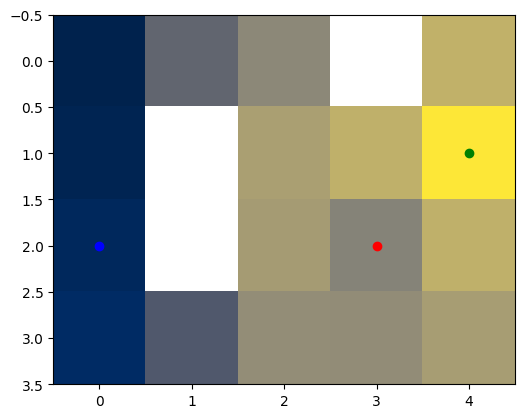

In [36]:
plt.imshow(turti.world_knowledge, cmap='cividis', norm='linear')
plt.scatter(turti.initial_state[1], turti.initial_state[0], color='b')
plt.scatter(WIN_STATE[1], WIN_STATE[0], color='g')
plt.scatter(LOSE_STATE[1], LOSE_STATE[0], color='r')

In [279]:
print(GRID_WORLD)

[[ 0.  0.  0. nan  0.]
 [ 0. nan  0.  0.  1.]
 [ 0. nan  0. -1.  0.]
 [ 0.  0.  0.  0.  0.]]


In [ ]:
# Asumiendo que la clase Agent y sus métodos están definidos correctamente...

# Función para convertir coordenadas de la cuadrícula a coordenadas de Turtle
def grid_to_turtle(row, col):
    x = col * 200 - N_COLS / 2 * 200 + 200 / 2
    y = N_ROWS / 2 * 200 - row * 200 - 200 / 2
    return (x, y)

t.showturtle()  # Asegurarnos de que la tortuga sea visible
t.speed('fastest')  # Configura una velocidad adecuada para ver los movimientos

# Moviendo la tortuga basado en acciones del agente
for _ in range(500):
    next_action = turti.choose_action()
    turti.move(next_action)
    turtle_pos = grid_to_turtle(turti.current_state[0], turti.current_state[1])
    t.penup()
    t.goto(turtle_pos)
    t.pendown()
    # Aquí puedes añadir lógica adicional, por ejemplo, cambiar de color o marcar la celda visitada
    # Dibujo del recorrido del agente


# t.done()  # Ya no necesitas esta línea si quieres que el ciclo continúe ejecutándose